## API Documentation

https://finnhub.io/docs/api#aggregate-indicator

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import requests 
from bs4 import BeautifulSoup
import finnhub
import re
from datetime import timedelta, datetime, date
import time
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import math
from time import sleep
import pandas_datareader as pdr
from sklearn.linear_model import LogisticRegression as LR

# Start Here

In [2]:
# datetime.strptime(time.ctime(int(yesterday)), "%a %b %d %H:%M:%S %Y")


In [3]:
wiki_text = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies').text

In [4]:
stock_tickr_html = re.findall('rel="nofollow" class="external text".*</a>',wiki_text)
stock_tickers = [re.sub('</a>','',re.sub('^.*">','',stock)) for stock in stock_tickr_html]
stock_tickers_clean = [stock for stock in stock_tickers if stock != 'reports' and re.match('[A-Z]{1,4}', stock)][:505]

stock_tickers_clean

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO

In [7]:
r = requests.get(f'https://finnhub.io/api/v1/scan/technical-indicator?symbol=AAPL&resolution=D&token=btj7jgn48v6p9f1q4oe0')

json_type = r.json()



In [8]:
json_type

{'technicalAnalysis': {'count': {'buy': 7, 'neutral': 7, 'sell': 3},
  'signal': 'buy'},
 'trend': {'adx': 20.29844772636207, 'trending': False}}

In [9]:
neutral = json_type.get('technicalAnalysis').get('count').get('neutral')
buy = json_type.get('technicalAnalysis').get('count').get('buy')
sell = json_type.get('technicalAnalysis').get('count').get('sell')

buy + neutral - sell

11

In [10]:

def get_stock_analysis(stock_count = 15):

    stock_indicator_dict = {'ticker' : [], 'indication' : [], 'ind_strength' : []}

    for stock in stock_tickers_clean[0:stock_count + 1]:

        sleep(0.35)

        r = requests.get(f'https://finnhub.io/api/v1/scan/technical-indicator?symbol={stock}&resolution=D&token=btj7jgn48v6p9f1q4oe0')

        json_type = r.json()

        try:

            neutral = json_type.get('technicalAnalysis').get('count').get('neutral')

        except:

            neutral = 0

        try:

            buy = json_type.get('technicalAnalysis').get('count').get('buy')

        except:

            buy = 0

        try:

            sell = json_type.get('technicalAnalysis').get('count').get('sell')

        except:

            sell = 0

        try:

            agg_result = json_type.get('technicalAnalysis').get('signal')

        except:

            agg_result = None


        if (sell + buy + math.floor(neutral * 0.6)) > 0:

            if "sell" in agg_result:

                calculation = round(sell / (sell + buy + math.floor(neutral * 0.6)),2)

                stock_indicator_dict['ticker'].append(stock) 
                stock_indicator_dict['indication'].append(agg_result)
                stock_indicator_dict['ind_strength'].append(calculation)
        #         print(stock, agg_result, calculation)

            elif "buy" in agg_result:

                calculation = round(buy / (sell + buy + math.floor(neutral * 0.6)),2)

                stock_indicator_dict['ticker'].append(stock) 
                stock_indicator_dict['indication'].append(agg_result)
                stock_indicator_dict['ind_strength'].append(calculation)

        #         print(stock, agg_result, calculation)

            else:

                continue

        else:

            continue


    stock_df = pd.DataFrame.from_dict(stock_indicator_dict) 
    
    return(stock_df)


In [11]:
%time
stock_df = get_stock_analysis(15)

In [12]:
stock_df

,ticker,indication,ind_strength
0,ABT,buy,0.71
1,ADBE,buy,0.50
2,AMD,buy,0.57
3,AAP,buy,0.54
4,AES,buy,0.60
5,AFL,buy,0.57
6,A,strong buy,0.80
7,AKAM,buy,0.57


In [28]:
strong_movers = stock_df[stock_df['ind_strength'] >= 0.60]

In [29]:
strong_movers

,ticker,indication,ind_strength
0,ABT,buy,0.71
4,AES,buy,0.60
6,A,strong buy,0.80


In [13]:
stock_df[stock_df['indication'].str.contains('strong')]

,ticker,indication,ind_strength


In [14]:
strong_movers['ticker'].values

array(['ABT', 'AMD', 'AES', 'AFL'], dtype=object)

In [86]:
date.today()

datetime.date(2020, 10, 6)

In [4]:
yesterday = (date.today() - timedelta(days = 1)).strftime("%Y-%m-%d")
trail_105 = (date.today() - timedelta(days = 105)).strftime("%Y-%m-%d")

stock = 'PENN'

df = pdr.DataReader(stock, 'yahoo', trail_105, yesterday)

# List where we will keep track of long and short average points
indicators = pd.DataFrame(index=df.index)

# Exponential moving averages using the closing data | Most important ma days (5,9,15,26)
#Include 100 day moving average
short = 5
long = 26
indicators['short_avg'] = df['Close'].ewm(span=short, adjust=False).mean()
indicators['long_avg'] = df['Close'].ewm(span=long, adjust=False).mean()

df = df.merge(indicators, on = df.index)

df["diff"] = df['short_avg'] - df['long_avg']

df['indicator'] = np.where(
    abs(df['diff']) < 0.2,
    1.0,
    0.0
)

df['chart_indicator'] = np.where(
    abs(df['diff']) < 0.2,
    df['diff'].index,
    0
)

fig = go.Figure()

# Create and style traces
fig.add_trace(go.Scatter(x=df['key_0'], y=df['Close'], name='Close',
                         line=dict(color='royalblue', width=2.5)))

fig.add_trace(go.Scatter(x=df['key_0'], y=df['short_avg'], name = f'{short} Moving Avg.',
                         line=dict(color='firebrick', width=1.5, dash = 'dash')))

fig.add_trace(go.Scatter(x=df['key_0'], y=df['long_avg'], name=f'{long} Moving Avg.',
                         line=dict(color='green', width=1.5,
                              dash='dash') # dash options include 'dash', 'dot', and 'dashdot'
))

fig.update_layout(title=f'{stock} Price Trend',
                   xaxis_title='Day',
                   yaxis_title='Price')


### **World Markets:**
* Japan - ^N225
* Europe - ^N100
* China - 000001.SS

In [14]:
df['daily_change'] = df['Close'] - df['Open']

df['gains'] = np.where(
    df['daily_change'] > 0,
    df['daily_change'],
    0
)

df['loss'] = np.where(
    df['daily_change'] < 0,
    df['daily_change'],
    0
)

df['up_down'] = np.where(
    df['daily_change'] < 0,
    0.0,
    1.0
)

In [15]:
print("Average daily gains:",str(round(sum(df['gains']) / len(df['gains']),2)))

print("Average daily losses:",str(round(sum(df['loss']) / len(df['loss']),2)))

Average daily gains: 0.5
Average daily losses: -0.36


In [16]:
df

,key_0,High,Low,Open,Close,Volume,Adj Close,short_avg,long_avg,diff,indicator,chart_indicator,daily_change,gains,loss,up_down
0,2020-06-26,87.559998,85.519997,87.230003,85.900002,2225800.0,85.565720,85.900002,85.900002,0.000000,1.0,0,-1.330002,0.000000,-1.330002,0.0
1,2020-06-29,87.360001,86.110001,86.559998,87.290001,1302500.0,87.132896,86.363335,86.032382,0.330952,0.0,0,0.730003,0.730003,0.000000,1.0
2,2020-06-30,88.879997,87.239998,87.330002,88.370003,1920200.0,88.210953,87.032224,86.255013,0.777211,0.0,0,1.040001,1.040001,0.000000,1.0
3,2020-07-01,88.889999,87.300003,88.889999,88.110001,1137000.0,87.951416,87.391483,86.431678,0.959804,0.0,0,-0.779999,0.000000,-0.779999,0.0
4,2020-07-02,89.489998,88.550003,88.830002,88.680000,1507700.0,88.520393,87.820989,86.645804,1.175184,0.0,0,-0.150002,0.000000,-0.150002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2020-10-02,101.279999,99.809998,100.209999,100.010002,712200.0,99.830002,100.090996,99.148301,0.942695,0.0,0,-0.199997,0.000000,-0.199997,0.0
69,2020-10-05,103.459999,100.959999,100.989998,103.120003,803900.0,103.120003,101.100665,99.526558,1.574107,0.0,0,2.130005,2.130005,0.000000,1.0
70,2020-10-06,103.330002,101.480003,103.120003,101.629997,1078000.0,101.629997,101.277109,99.726886,1.550223,0.0,0,-1.490005,0.000000,-1.490005,0.0
71,2020-10-07,104.750000,102.419998,102.470001,103.879997,1322100.0,103.879997,102.144738,100.122420,2.022318,0.0,0,1.409996,1.409996,0.000000,1.0


In [17]:
df = df.drop('chart_indicator', axis = 1)
dates = df['key_0']
df = df.drop('key_0', axis = 1)

df.dtypes

High            float64
Low             float64
Open            float64
Close           float64
Volume          float64
Adj Close       float64
short_avg       float64
long_avg        float64
diff            float64
indicator       float64
daily_change    float64
gains           float64
loss            float64
up_down         float64
dtype: object

In [18]:
list(df.columns)

['High',
 'Low',
 'Open',
 'Close',
 'Volume',
 'Adj Close',
 'short_avg',
 'long_avg',
 'diff',
 'indicator',
 'daily_change',
 'gains',
 'loss',
 'up_down']

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

test_df = df.copy()

test_df = pd.DataFrame(scaler.fit_transform(test_df))
test_df.columns = list(df.columns)

In [20]:
test_df.corr()

,High,Low,Open,Close,Volume,Adj Close,short_avg,long_avg,diff,indicator,daily_change,gains,loss,up_down
High,1.000000,0.983595,0.982763,0.986850,-0.208732,0.986651,0.981366,0.931669,-0.019751,-0.024267,0.007508,0.116549,-0.106805,-0.014620
Low,0.983595,1.000000,0.978793,0.985878,-0.276681,0.985779,0.971160,0.920256,-0.012614,-0.015006,0.018359,0.046079,-0.016327,-0.005115
Open,0.982763,0.978793,1.000000,0.961721,-0.255185,0.961440,0.975522,0.927776,-0.026283,-0.020368,-0.145577,-0.046706,-0.197122,-0.135679
Close,0.986850,0.985878,0.961721,1.000000,-0.236510,0.999949,0.973770,0.919709,-0.000513,-0.031000,0.131107,0.184653,0.031404,0.070350
Volume,-0.208732,-0.276681,-0.255185,-0.236510,1.000000,-0.238089,-0.255299,-0.270142,0.116759,0.113790,0.069303,0.174943,-0.062656,0.143519
Adj Close,0.986651,0.985779,0.961440,0.999949,-0.238089,1.000000,0.973222,0.918761,0.001218,-0.033679,0.131940,0.185421,0.032018,0.070391
short_avg,0.981366,0.971160,0.975522,0.973770,-0.255299,0.973222,1.000000,0.968865,-0.098521,-0.022548,-0.013523,0.081552,-0.106332,-0.047520
long_avg,0.931669,0.920256,0.927776,0.919709,-0.270142,0.918761,0.968865,1.000000,-0.341840,0.069765,-0.035967,0.056212,-0.118134,-0.066506
diff,-0.019751,-0.012614,-0.026283,-0.000513,0.116759,0.001218,-0.098521,-0.341840,1.000000,-0.365990,0.093232,0.083609,0.071215,0.086940
indicator,-0.024267,-0.015006,-0.020368,-0.031000,0.113790,-0.033679,-0.022548,0.069765,-0.365990,1.000000,-0.038235,-0.067146,0.004468,-0.080606


In [21]:
df_clean = df[['Adj Close', 'long_avg', 'daily_change', 'loss', 'up_down']]

adj_X = df_clean.drop('up_down', axis = 1)
adj_y = df_clean["up_down"]

In [22]:
# Note the difference in argument order
model = sm.OLS(adj_y, adj_X).fit()

model.summary()

NameError: name 'sm' is not defined

In [25]:
clf = LR(random_state=0).fit(adj_X, adj_y)

clf.score(adj_X, adj_y)

0.9863013698630136

In [27]:
clf.predict_proba(adj_X)

array([[9.95055789e-01, 4.94421086e-03],
       [7.24575733e-02, 9.27542427e-01],
       [2.71858145e-02, 9.72814186e-01],
       [9.46878110e-01, 5.31218896e-02],
       [5.64946946e-01, 4.35053054e-01],
       [2.18500531e-01, 7.81499469e-01],
       [1.85372941e-01, 8.14627059e-01],
       [4.00192288e-01, 5.99807712e-01],
       [2.35638747e-01, 7.64361253e-01],
       [8.16995728e-01, 1.83004272e-01],
       [9.36064453e-01, 6.39355473e-02],
       [2.32680200e-03, 9.97673198e-01],
       [1.80008489e-02, 9.81999151e-01],
       [5.14382844e-01, 4.85617156e-01],
       [3.03082792e-02, 9.69691721e-01],
       [1.90960825e-01, 8.09039175e-01],
       [1.29414717e-01, 8.70585283e-01],
       [3.92050817e-01, 6.07949183e-01],
       [3.42174869e-01, 6.57825131e-01],
       [9.90036564e-01, 9.96343568e-03],
       [5.57803143e-04, 9.99442197e-01],
       [9.98837371e-01, 1.16262861e-03],
       [1.41380742e-02, 9.85861926e-01],
       [6.57947396e-01, 3.42052604e-01],
       [2.094405

In [23]:
df.corr()[['up_down']]

,up_down
High,0.044670
Low,0.041947
Open,-0.026469
Close,0.114465
Volume,0.161277
Adj Close,0.114465
short_avg,0.046053
long_avg,0.066186
diff,-0.054878
indicator,-0.020545


In [24]:
import statsmodels.api as sm

X = df.drop('up_down', axis = 1)
y = df["up_down"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                up_down   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                              38.58
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                    1.60e-22
Time:                        11:10:36   Log-Likelihood:                         -12.800
No. Observations:                  73   AIC:                                      43.60
Df Residuals:                      64   BIC:                                      64.21
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
High            -0.1059      0.068     -1.555      0.125      -0.242       0.030
Low             -0.0752      0.054     -1.381      0.172      -0.184       0.034
Open             0.0058      0.030      0.192      0.849      -0.055       0.066
Close            0.0775      0.025      3.119      0.003       0.028       0.127
Volume        1.345e-09   1.92e-09      0.701      0.486   -2.49e-09    5.18e-09
Adj Close        0.0775      0.025      3.119      0.003       0.028       0.127
short_avg        0.0130      0.021      0.618      0.539      -0.029       0.055
long_avg         0.0160      0.008      2.057      0.044       0.000       0.032
diff            -0.0030      0.015     -0.197      0.844      -0.034       0.028
indicator       -0.1342      0.135     -0.995      0.324      -0.404       0.135
daily_change     0.0717      0.009      7.662      0.000       0.053       0.090
gains           -0.0241      0.038     -0.628      0.532      -0.101       0.052
loss             0.0958      0.041      2.344      0.022       0.014       0.177
==============================================================================
Omnibus:                        4.774   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                2.213
Skew:                          -0.046   Prob(JB):                        0.331
Kurtosis:                       2.152   Cond. No.                     8.10e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.05e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
clf = LR(random_state=0).fit(X, y)

In [29]:
clf.score(X,y)

0.5342465753424658

In [28]:
# data_df = pd.DataFrame.from_dict(json_type)

# data_df['t'] = data_df['t'].apply(lambda x: datetime.strptime(time.ctime(x), "%a %b %d %H:%M:%S %Y"))

# data_df = data_df.rename(columns = {'c' : 'close', 'h' : 'high', 'l' : 'low', 'o' : 'open', 't' : 'date', 'v' : 'volume'})


In [ ]:
data_df

In [ ]:
plt.plot(data_df['date'], data_df['close'])

In [ ]:
start = datetime.datetime(2018, 1, 1)
# Up to most recent data
end = datetime.date.today()


yesterday = (datetime.date.today() - timedelta(days = 1)).strftime("%Y-%m-%d")
trail_45 = (datetime.date.today() - timedelta(days = 45)).strftime("%Y-%m-%d")

print(yesterday)
print(trail_45)

In [12]:
import pandas_datareader as pdr
import datetime
# We can choose any date up to that stock’s IPO
start = datetime.datetime(2018, 1, 1)
# Up to most recent data
end = datetime.date.today()


yesterday = (datetime.date.today() - timedelta(days = 1)).strftime("%Y-%m-%d")
trail_100 = (datetime.date.today() - timedelta(days = 100)).strftime("%Y-%m-%d")


# We’ll look at F which is Ford
stock = 'TSLA'
df = pdr.DataReader(stock, 'yahoo', trail_100, yesterday)
# This returns a data frame of scraped stock data from yahoo

df

# trail_45

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-23,202.399994,198.802002,199.776001,200.356003,31826500.0,200.356003
2020-06-24,200.175995,190.628006,198.822006,192.169998,54798000.0,192.169998
2020-06-25,197.195999,187.429993,190.854004,197.195999,46272500.0,197.195999
2020-06-26,199.000000,190.973999,198.955994,191.947998,44274500.0,191.947998
2020-06-29,202.000000,189.703995,193.802002,201.869995,45132000.0,201.869995
...,...,...,...,...,...,...
2020-09-24,399.500000,351.299988,363.799988,387.790009,96561100.0,387.790009
2020-09-25,408.730011,391.299988,393.470001,407.339996,67208500.0,407.339996
2020-09-28,428.079987,415.549988,424.619995,421.200012,49719600.0,421.200012


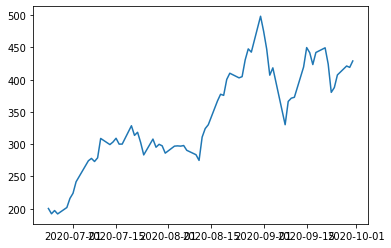

In [13]:
plt.plot(df.index, df['Close'].values)

In [31]:
# List where we will keep track of long and short average points
indicators = pd.DataFrame(index=df.index)
# 50 day
short_window = 50
# 200 day
long_window = 200
# Exponential moving averages using the closing data
short = 5
long = 20
indicators['short_avg'] = df['Close'].ewm(span=short, adjust=False).mean()
indicators['long_avg'] = df['Close'].ewm(span=long, adjust=False).mean()

In [32]:
df = df.merge(indicators, on = df.index)

df["diff"] = df['short_avg'] - df['long_avg']

df['indicator'] = np.where(
    abs(df['diff']) < 0.2,
    1,
    0
)

df['chart_indicator'] = np.where(
    abs(df['diff']) < 0.2,
    df['diff'].index,
    0
)


In [47]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=df['key_0'], y=df['Close'], name='Close',
                         line=dict(color='royalblue', width=2.5)))

fig.add_trace(go.Scatter(x=df['key_0'], y=df['short_avg'], name = f'{short} Moving Avg.',
                         line=dict(color='firebrick', width=1.5, dash = 'dash')))

fig.add_trace(go.Scatter(x=df['key_0'], y=df['long_avg'], name=f'{long} Moving Avg.',
                         line=dict(color='green', width=1.5,
                              dash='dash') # dash options include 'dash', 'dot', and 'dashdot'
))

fig.update_layout(title=f'{stock} Price Trend',
                   xaxis_title='Day',
                   yaxis_title='Price')

In [ ]:


df

In [ ]:
result = seasonal_decompose(df['Close'], period = 1, model = 'additive')
result.plot()
plt.show()

In [ ]:
log_data = [math.log(x) for x in df['Close']]


model = ARIMA(log_data, order = (1,2,0))
results = model.fit(disp = -1)

plt.plot(log_data)
plt.plot(results.fittedvalues, color = 'red')

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

from urllib.request import urlopen, Request

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rayechevarria/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
analyzer = SentimentIntensityAnalyzer()

analyzer.polarity_scores("This sentence is so positive that it is very good").get('compound')

0.8119

In [36]:
news_url = "https://finviz.com/quote.ashx?t="

print(news_url + stock)

https://finviz.com/quote.ashx?t=A


In [37]:
stock_news = requests.get(news_url + stock, 'html').text

In [38]:
stock_news

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1"/>\r\n<title>403 - Forbidden: Access is denied.</title>\r\n<style type="text/css">\r\n<!--\r\nbody{margin:0;font-size:.7em;font-family:Verdana, Arial, Helvetica, sans-serif;background:#EEEEEE;}\r\nfieldset{padding:0 15px 10px 15px;} \r\nh1{font-size:2.4em;margin:0;color:#FFF;}\r\nh2{font-size:1.7em;margin:0;color:#CC0000;} \r\nh3{font-size:1.2em;margin:10px 0 0 0;color:#000000;} \r\n#header{width:96%;margin:0 0 0 0;padding:6px 2% 6px 2%;font-family:"trebuchet MS", Verdana, sans-serif;color:#FFF;\r\nbackground-color:#555555;}\r\n#content{margin:0 0 0 2%;position:relative;}\r\n.content-container{background:#FFF;width:96%;margin-top:8px;padding:10px;position:relative;}\r\n-->\r\n</style>\r\n</head>\r\n<body>\r\n<div id="header"><h1>Server Error</h1></

In [39]:
news_tables = {}

url = news_url + stock
req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
resp = urlopen(req)    
html = BeautifulSoup(resp, features="lxml")
news_table = html.find(id='news-table')
news_tables[stock] = news_table

In [40]:
news_tables

{'A': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" style="white-space:nowrap" width="130">Oct-08-20 10:32AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/agilent-announces-availability-objective-decision-143200458.html" target="_blank">Agilent Announces the Availability of Objective Decision Support for Pathologists Reviewing Breast Cancer Cases</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Business Wire</span></div></div></td></tr>
 <tr><td align="right" style="white-space:nowrap" width="130">Oct-07-20 04:44PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.investors.com/market-trend/stock-market-today/dow-jones-rises-530-points-on-stimulus-hopes-several-leading-stocks-break-out/?src=A00220

In [41]:
for i in news_tables[stock].find_all('div', {'class' : 'news-link-left'}):
    
    try:
        print(i.text)
    
#         print(re.search(' [A-Z].*$',i.text).group())

        print(analyzer.polarity_scores(re.search(' [A-Z].*$',i.text).group()).get('compound'))
        
    except:
        
        print(i.text)


Agilent Announces the Availability of Objective Decision Support for Pathologists Reviewing Breast Cancer Cases
-0.4019
Dow Jones Rises 530 Points On Stimulus Hopes; Several Leading Stocks Break Out
0.4215
Nike, OrganiGram, Thermo Fisher, Danaher Corp and Agilent Tech highlighted as Zacks Bull and Bear of the Day
0.0
Agilent (A) Up 2% Since Last Earnings Report: Can It Continue?
0.0
Agilent Expands Line of Innovative Flow Cytometers with the NovoCyte Penteon
0.5106
What Does Agilent Technologies' (NYSE:A) CEO Pay Reveal?
-0.1027
Agilent Announces Cash Dividend of 18 Cents Per Share
0.296
Hedge Funds Are Coming Back To Agilent Technologies Inc. (A)
0.0
Agilent Announces Webcast for Investment Community
0.0
Agilent Announces SureSelect XT HS2 RNA Reagent Kit, a Library Prep and Target Enrichment Solution for RNA-Seq
0.3182
Why Agilent Technologies (A) Stock is a Compelling Investment Case
0.2263
Agilent Sets the Standard in Customer Flexibility with Analytical Technology Subscription Mod

## Google Trends API Docs

https://pypi.org/project/pytrends/

In [42]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [43]:
yesterday = (date.today() - timedelta(days = 1)).strftime("%Y-%m-%d")
trail_30 = (date.today() - timedelta(days = 30)).strftime("%Y-%m-%d")

In [44]:
f'{trail_30} {yesterday}'

'2020-09-09 2020-10-08'

In [54]:
kw_list = [stock + " stock"]
pytrends.build_payload(kw_list, cat=0, timeframe=f'{trail_30} {yesterday}', geo='US', gprop='')

In [55]:
pytrends.interest_over_time().reset_index()

,date,MSFT stock,isPartial
0,2020-09-09,100,False
1,2020-09-10,76,False
2,2020-09-11,62,False
3,2020-09-12,20,False
4,2020-09-13,13,False
5,2020-09-14,90,False
6,2020-09-15,76,False
7,2020-09-16,58,False
8,2020-09-17,65,False
9,2020-09-18,57,False


In [53]:
news_tables['TFX'].find_all('div', {'class' : 'news-link-left'})[0].text

"A Look At Teleflex's (NYSE:TFX) CEO Remuneration"